# Unsupervised Machine Learning for the Classification of Astrophysical X-ray Sources
###### *Víctor Samuel Pérez Díaz<sup>1,2</sup>, Rafael Martinez-Galarza<sup>1</sup>, Alexander Caicedo-Dorado<sup>2</sup>, Raffaele D'Abrusco<sup>1</sup>*

*1. Center for Astrophysics | Harvard & Smithsonian, 2. Universidad del Rosario*

Contact ```vperezdiaz@cfa.harvard.edu``` for questions or comments.


#### Classification

---

In [120]:
%load_ext autoreload
%autoreload 2

from umlcaxs_lib import votable_to_pandas, lognorm, mahalanobis, mahal_classifier_cl, create_summary_tables
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_cluster_csc_simbad = pd.read_csv('./out_data/cluster_csc_simbad.csv', index_col=0)

C:\Users\samue\miniconda3\envs\astrox\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (56,63,64,65,66,67,68,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
nans_df_csc_simbad = df_cluster_csc_simbad.copy(deep=True).fillna({'main_type': 'NaN'})

In [4]:
# Features that we use in our analysis
features = ['hard_hm', 'hard_hs', 'hard_ms', 'powlaw_gamma', 'bb_kt', 'var_prob_b','var_ratio_b', 'var_prob_h', 'var_ratio_h', 'var_prob_s', 'var_ratio_s', 'var_newq_b']

# Features to log transform and normalize
features_lognorm = ['bb_kt', 'var_ratio_h', 'var_ratio_b', 'var_ratio_s', 'var_newq_b']

# Features to normalize
features_norm = ['powlaw_gamma']

# Drop data with missing values in features
df_cscs_out = nans_df_csc_simbad.dropna(subset=features)

In [5]:
# Normalize or log normalize
df_cscs_lognorm = lognorm(df_cscs_out, features, features_norm, features_lognorm)

In [126]:
n = 0
uks = ['Star', 'X', 'Unknown']
ltypes = ['QSO', 'AGN', 'Seyfert_1', 'Seyfert_2', 'HMXB', 'LMXB', 'XB', 'YSO', 'TTau*', 'Orion_V*']
cl_n = df_cscs_lognorm[df_cscs_lognorm.cluster == n]
#cl_n_nans = pd.read_csv(f'mahalanobis_labeled/cl{n}_mean.csv', index_col=0)
cl_n_nans = mahal_classifier_cl(cl_n, features, ltypes, uks=uks)
cl_n_nans.head(10)

,name,obsid,cluster,main_type,QSO,AGN,Seyfert_1,Seyfert_2,HMXB,LMXB,XB,YSO,TTau*,Orion_V*
6,2CXO J000031.1-500914,11997,0,Orion_V*,2.997126e-148,1.862888e-46,9.252012e-106,0.000000e+00,1.306302e-05,4.141674e-02,2.415668e-43,7.234205e-01,4.492126e-03,2.306575e-01
15,2CXO J000136.1+130639,8491,0,HMXB,9.932933e-01,6.662002e-06,1.460626e-05,4.407566e-201,6.632586e-03,2.129245e-12,1.141557e-75,5.286571e-05,4.739824e-18,3.372647e-11
75,2CXO J001359.9-390303,2255,0,Seyfert_1,5.379628e-01,1.930168e-23,4.614893e-01,1.888329e-18,4.680730e-04,2.281117e-06,1.037865e-315,6.736874e-05,1.692164e-06,8.561154e-06
94,2CXO J001604.3-270731,7906,0,QSO,1.602440e-107,9.297882e-28,2.545452e-77,0.000000e+00,1.692441e-04,2.216917e-06,0.000000e+00,6.111619e-03,9.669414e-01,2.677552e-02
116,2CXO J002111.3-084140,4102,0,Orion_V*,6.697074e-33,2.472535e-28,4.956350e-26,6.805090e-86,9.609752e-42,9.995906e-01,1.701796e-241,8.151887e-08,2.101714e-22,4.093222e-04
147,2CXO J002446.8-721235,2737,0,QSO,1.306881e-298,3.507331e-169,2.864828e-239,0.000000e+00,3.698764e-34,9.519356e-55,0.000000e+00,1.271237e-05,9.999026e-01,8.469125e-05
161,2CXO J002519.7-123303,10413,0,YSO,3.256013e-01,4.344128e-04,7.963694e-04,6.593433e-01,1.089237e-10,3.583376e-03,2.843256e-14,9.775662e-03,6.410370e-05,4.014954e-04
175,2CXO J002549.0-122659,3251,0,AGN,1.195338e-07,1.244287e-20,2.267126e-09,1.446979e-09,1.291669e-05,4.824091e-07,1.444049e-27,1.571585e-01,8.528310e-02,7.575449e-01
203,2CXO J003542.8-201920,3262,0,Seyfert_1,7.406820e-01,8.507030e-23,4.464397e-14,8.398848e-23,2.593179e-01,9.984337e-22,4.069094e-22,1.014997e-07,8.748270e-58,6.059985e-42
211,2CXO J003652.3-333315,2019,0,QSO,9.384166e-01,2.640878e-11,1.140505e-02,2.408558e-03,4.773593e-02,2.689845e-06,1.095720e-112,3.120393e-05,8.723302e-20,3.272456e-13


In [127]:
create_summary_tables(df_cscs_lognorm[df_cscs_lognorm.cluster == n]).sort_values(by='size', ascending=False).head(10)

,size
main_type,
NaN,884
Star,310
Orion_V*,310
YSO,264
QSO,185
TTau*,165
X,144
PartofG,105
Seyfert_1,52


<AxesSubplot:>

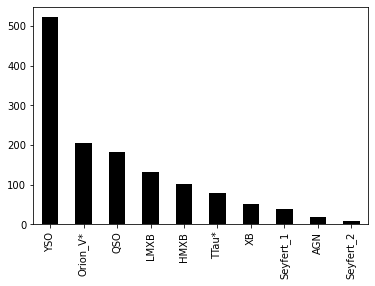

In [128]:
cl_n_nans['main_type'].value_counts().plot.bar(color='black')